#  Weather prediction

### Import the dependance librarry

In [ ]:
# before that we have install some libraries
!pip install plotly

In [70]:
# importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
# now we have to read the csv file
global_temp = pd.read_csv("GlobalTemperatures.csv")

In [36]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
print(global_temp.shape)  # shape of csv file
print(global_temp.columns) # column names
print(global_temp.info())  # info of csv file
print(global_temp.isnull().sum())  # sum of each column with null value

(3192, 9)
Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   

## Data preparation

In [67]:
df = global_temp
# Let's just consider the LandAverageTemperature
# "A primarily label-location based indexer"
df = df.iloc[:,:2]
df.head()

,dt,LandAverageTemperature
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573


In [68]:
df.describe()


,LandAverageTemperature
count,3180.000000
mean,8.374731
std,4.381310
min,-2.080000
25%,4.312000
50%,8.610500
75%,12.548250
max,19.021000


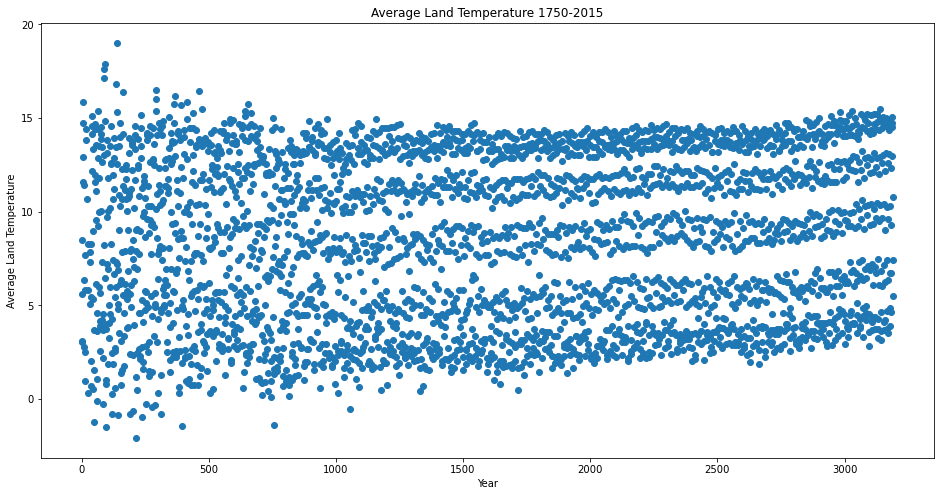

In [72]:
# Cursory plot
plt.figure(figsize = (16, 8))
plt.scatter(x = df['LandAverageTemperature'].index, y = df['LandAverageTemperature'])
plt.title("Average Land Temperature 1750-2015")
plt.xlabel("Year")
plt.ylabel("Average Land Temperature")
plt.show()

In [73]:
# Maybe we can try only by year?
# But notice that the dt column is made up of strings
print(type(df['dt'][0]))

<class 'str'>


In [74]:
# Convert to datetime object
times = pd.DatetimeIndex(df['dt'])

# Group by year
grouped = df.groupby([times.year]).mean()

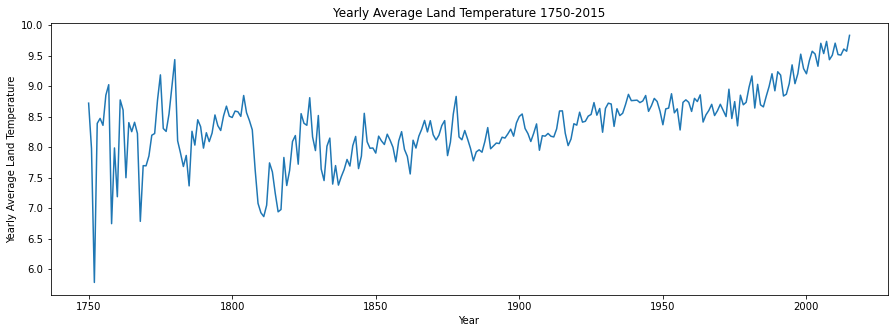

In [75]:
# Plot
plt.figure(figsize = (15, 5))
plt.plot(grouped['LandAverageTemperature'])

# Change features of the graph
plt.title("Yearly Average Land Temperature 1750-2015")
plt.xlabel("Year")
plt.ylabel("Yearly Average Land Temperature")
plt.show()

In [76]:
# What caused those anomalies?
grouped.head()

,LandAverageTemperature
dt,
1750,8.719364
1751,7.976143
1752,5.779833
1753,8.388083
1754,8.469333


In [77]:

# Check what happened in 1752
df[times.year == 1752]

,dt,LandAverageTemperature
24,1752-01-01,0.348
25,1752-02-01,NaN
26,1752-03-01,5.806
27,1752-04-01,8.265
28,1752-05-01,NaN
29,1752-06-01,NaN
30,1752-07-01,NaN
31,1752-08-01,NaN
32,1752-09-01,NaN
33,1752-10-01,7.839


In [78]:
# There are a lot of null values! What else?
df[np.isnan(df['LandAverageTemperature'])]

,dt,LandAverageTemperature
10,1750-11-01,NaN
16,1751-05-01,NaN
18,1751-07-01,NaN
21,1751-10-01,NaN
22,1751-11-01,NaN
23,1751-12-01,NaN
25,1752-02-01,NaN
28,1752-05-01,NaN
29,1752-06-01,NaN
30,1752-07-01,NaN


In [79]:
# Use previous valid observation to fill gap
df['LandAverageTemperature'] = df['LandAverageTemperature'].fillna(method='ffill')

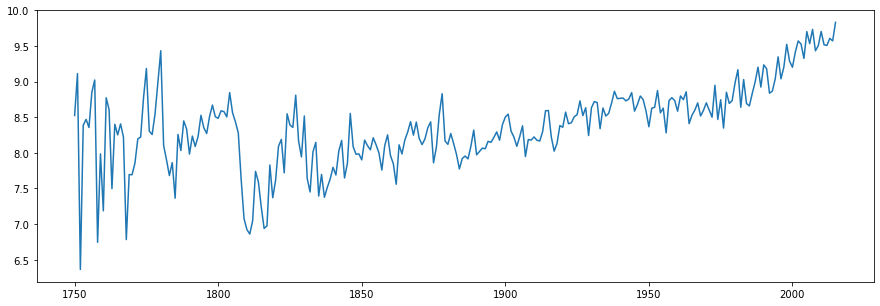

In [80]:
# Regroup and plot
grouped = df.groupby([times.year]).mean()

# Better, but still not perfect
# What are some other ways to fill the NaN values?
plt.figure(figsize = (15, 5))
plt.plot(grouped['LandAverageTemperature'])
plt.show()

## Model

In [96]:
# Let's model!
from sklearn.linear_model import LinearRegression as LinReg

x = grouped.index.values.reshape(-1, 1)
y = grouped['LandAverageTemperature'].values

reg = LinReg()
reg.fit(x, y)
y_preds = reg.predict(x)
print("Accuracy: " + str(reg.score(x, y)))

Accuracy: 0.3766832275309072


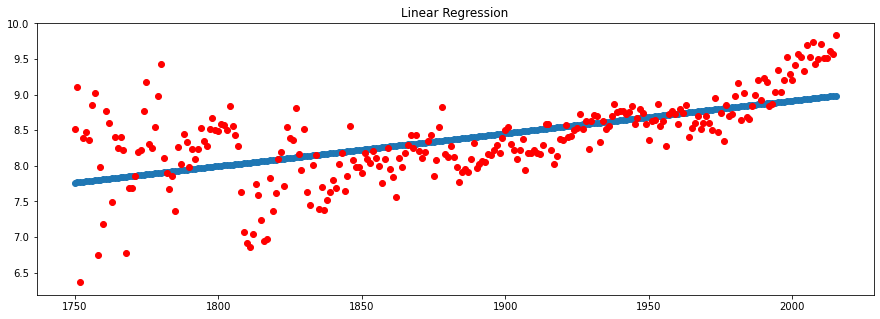

In [82]:

plt.figure(figsize = (15, 5))
plt.title("Linear Regression")
plt.scatter(x = x, y = y_preds)
plt.scatter(x = x, y = y, c = "r")

In [103]:

reg.predict([[2030]])

array([9.05422508])